<div align="center">
    <h2> PRIMER RECURSO
    <h5>Aplicación de los teoremas de conservación
    <h5>Caso de estudio: el virial del Sistema Solar
</div>

<blockquote>
Universidad de Antioquia. <br>
Facultad de Ciencias Exactas y Naturales. <br>
<b>Advertencia</b>: recursos creados como parte del desarrollo del curso mecánica celeste (0311602) del pregrado de astronomía de la Universidad de Antioquia, bajo la dirección del profesor Jorge Zuluaga.
</blockquote>

## Algunos conceptos importantes

Para conocer las interacciones en el sistema solar se debe recurrir a las interacciones descritas por el problema de los N cuerpos. Para ello asumimos que la dinámica es estrictamente newtoniana, lo que incluye suponer que la única interacción a distancia entre las partículas es la interacción gravitacional. 

Primero, la interacción gravitacional como la fuerza gravitacional que produce una partícula de masa  M  sobre cualquier otra partícula de masa  m  situada en un punto arbitrario con posición relativa  r⃗   (donde  r⃗   es el vector que va de la posición de  M  a la del punto arbitratio) esta dada por :

\begin{equation}
\label{eq:fuerza_M_m}
\vec F=m\left(-\frac{GM}{r^3}{\vec r}\right)
\end{equation}


Y dado que la fuerza gravitacional es una fuerza conservativa, entonces la función de energía potencial es igual a:

\begin{equation}
\label{eq:energia_potencial_gravitacional}
U=-\frac{G M m}{r}
\end{equation}

Llevados a un sistema de N partículas, 

\begin{equation}
\label{eq:ncuerpos_formulacion_ecuaciones}
\vec{F}_{ij} = -\frac{Gm_i m_j}{r_{ij}^3} \vec r_{ij} \ 
\Rightarrow
\left\{\ddot{\vec r}_i= -\sum_{j\neq i} \frac{\mu_j}{r_{ij}^3} \vec{r}_{ij} \right\}_{N}
\end{equation}

Adicional a ello, si suponemos que nuestro sistema está aislado, podemos decir que hay con servación del momento lineal. Este teorema dice que si la fuerza externa total sobre un sistema de partículas es nula, el momentum total del sistema se mantiene constante: 

\begin{equation}
\vec{F}^\mathrm{E}=\sum_i \vec{F}_i^\mathrm{E}=0\Longleftrightarrow \vec{P}=\vec{P}_\mathrm{CM}
\end{equation}

Con $\vec{P}_\mathrm{CM}$ un vector constante.\
Además, si la torca externa total sobre un sistema de partículas es nula, el momento angular total del sistema se mantiene constante. El teorema de conservación del momento angular se puede escribir de la forma:
\begin{equation}
\vec{\tau} = \sum \vec{r}_i\times \vec{F}^E_i=\vec 0\Longleftrightarrow \vec{L}=\vec{L}_\mathrm{0}
\end{equation}

Por el teorema del trabajo y energía, para un sistema de partículas se tiene que la energía cinética total del sistema es de la forma:
\begin{equation}
\label{eq:K_CM_interno}
K = \frac{1}{2} M V^2 + \frac{1}{2} \sum m_i {v_i}'^2,
\end{equation}



## Paquetes y librerias necesarias para el reto

In [1]:
!python -m pip install spiceypy &> /dev/null
!python -m pip install matplotlib &> /dev/null
!python -m pip install seaborn &> /dev/null

%matplotlib inline

import matplotlib
import spiceypy as spy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 
sns.set_theme()

Bajar los archivos necesarios de SPICE (https://naif.jpl.nasa.gov/pub/naif/generic_kernels/):

In [ ]:
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/lsk/naif0012.tls &> /dev/null

In [ ]:
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/spk/planets/de435.bsp &> /dev/null

In [ ]:
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/pck/gm_de431.tpc &> /dev/null

In [2]:
#--------------------------------------------
#--- Leer los archivos o núcleos de SPICE ---
#--------------------------------------------
spy.furnsh(["naif0012.tls","de435.bsp","gm_de431.tpc"])

## Punto 1

Escoja una fecha específica (su fecha de nacimiento); usando exclusivamente SPICE, calcule la energía total del sistema formado por los 8 planetas y el Sol en Joules.  ¿Es positiva o negativa?.  Compare el orden de magnitud esa energía con el orden de magnitud de magnitud la energía cinética del planeta Júpiter.


In [3]:
#--------------------------------------------
#-----------  Fecha de nacimiento -----------
#--------------------------------------------
et=spy.str2et("2021-12-21 04:00:00 UTC-5")

#--------------------------------------------
#------- Valor de G tomado de la clase  -----
#--------------------------------------------
G=6.67e-20  # km^3 / kg s^2

#--------------------------------------------
#----  Lista de los objetos de interés  -----
#--------------------------------------------
id_list=[
    'Mercury Barycenter',
    'Venus Barycenter',
    'Earth-Moon Barycenter',
    'Mars Barycenter',
    'Jupiter Barycenter',
    'Saturn Barycenter',
    'Uranus Barycenter',
    'Neptune Barycenter',
    'Sun']

Estados=dict()
K_T=0


for i in range(0,9):
  estado_i,tf_i=spy.spkezr(id_list[i],et,"ECLIPJ2000","None",'SSB')
  #----------------------------------
  #--- Posiciones y velocidades  ----
  #----------------------------------
  r_i=estado_i[0:3] #km 
  v_i=estado_i[3:6] #km/sec. 
  Estados['r_%d' % i]= r_i
  Estados['v%d' % i]= v_i
    
  GM=spy.bodvrd(id_list[i],"GM",1)[1][0]
  M_i=GM/G
  Estados['M%d' % i]= M_i
  #----------------------------------
  #--- Energía cinetica -------------
  #----------------------------------
  K_i=M_i*spy.vnorm(v_i)**2/2  #kg(km/s)**2
  K_T=K_T+K_i
  Estados['K_%d' % i]= K_i
  Estados['K_T']= K_T
#-------------------------------------
#--- Energía potencial gravitacional -
#-------------------------------------
b = [0,1,2,3,4,5,6,7,8]
e = itertools.combinations(b,2)
k=0
U_T=0

for i,j in e:
  U_k=-G*Estados.get('M%d' %i)*Estados.get('M%d' %j) / spy.vnorm(Estados.get('r_%d' %i)-Estados.get('r_%d' %j) ) # (km**2)kg/(s**2)
  U_T= U_T + U_k
  Estados['U_%d' % k]= U_k
  Estados['U_T']= U_T
  k=k+1

In [4]:
#----------------------------------
#--- Energía total ----------------
#----------------------------------
jup='K_4'
E=Estados.get('K_T')+ Estados.get('U_T')  #kg(km/s)**2
print(f'La energía total del sistema solar es :{E:.2e} kg kmˆ2/sˆ2') 
print(f'La energía cinética de jupiter es :{Estados.get(jup):.2e} 1.7520923466246774e+29 kg kmˆ2/sˆ2' )  

La energía total del sistema solar es :-1.98e+29 kg kmˆ2/sˆ2
La energía cinética de jupiter es :1.75e+29 1.7520923466246774e+29 kg kmˆ2/sˆ2


## Punto 2

Usando también SPICE calcule la misma cantidad para un período de tiempo de 100 años (por ejemplo todo el siglo xx) en intervalos de entre 1 y 5 años.  Haga un gráfico de la energía como función del tiempo y muestre que el valor de esa cantidad es aproximadamente "constante", como lo predice la teoría.


In [5]:
#--------------------------------------------
#----  intervalo de tiempo  -----------------
#--------------------------------------------
et_i=spy.str2et("1921-12-21 04:00:00 UTC-5")
et_f=spy.str2et("2021-12-21 04:00:00 UTC-5")

time=np.linspace(et_i,et_f,100)

In [6]:
Estados2=dict()
Total=dict()
K_T=0
p=0

for e_t in time:
  for i in range(0,9):
    estado_i,tf_i=spy.spkezr(id_list[i],e_t,"ECLIPJ2000","None",'SSB')

    r_i=estado_i[0:3] #km 
    v_i=estado_i[3:6] #km/sec. 


    Estados2['r_%d' % i]= r_i
    Estados2['v%d' % i]= v_i


    GM=spy.bodvrd(id_list[i],"GM",1)[1][0]
    M_i=GM/G
    Estados2['M%d' % i]= M_i
    
    #----------------------------------
    #--- Energía cinetica -------------
    #----------------------------------
    K_i=M_i*spy.vnorm(v_i)**2/2  #kg(km/s)**2
    K_T=K_T+K_i  
    Total[f'K{p}']= K_T
  K_T=0
  K_i=0
  
  #-------------------------------------
  #--- Energía potencial gravitacional -
  #-------------------------------------
  b = [0,1,2,3,4,5,6,7,8]
  e = itertools.combinations(b,2)
  U_T=0
  for i,j in e:
    U_k=-G*Estados2.get('M%d' %i)*Estados2.get('M%d' %j) / spy.vnorm(Estados2.get('r_%d' %i)-Estados2.get('r_%d' %j) ) # (km**2)kg/(s**2)
    U_T= U_T + U_k
    Total[f'U{p}']= U_T
  p=p+1


In [7]:
K_T = np.array([(value) for key, value in Total.items() if key.startswith("K")])
U_T = np.array([(value) for key, value in Total.items() if key.startswith("U")])

In [8]:
#-------------------------------------
#--- Energía total por 100 años. -----
#-------------------------------------
E_T=K_T+U_T

In [9]:
Time=np.linspace(0,100*365.25*86400,100)

### Gráfico de la energía como función del tiempo

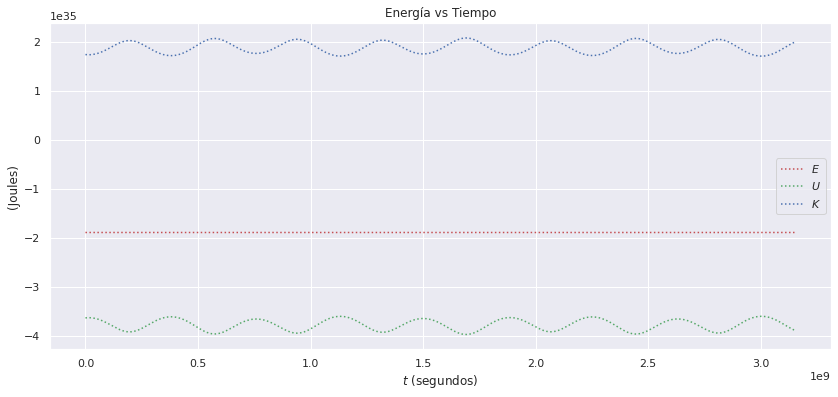

In [36]:
plt.figure(figsize=(14,6))
plt.title('Energía vs Tiempo')
plt.plot(Time,E_T*1000000,'r:',label="$E$")
plt.plot(Time,U_T*1000000,'g:',label="$U$")
plt.plot(Time,K_T*1000000,'b:',label="$K$")
plt.xlabel("$t$ (segundos)");
plt.ylabel("(Joules)");
plt.legend();

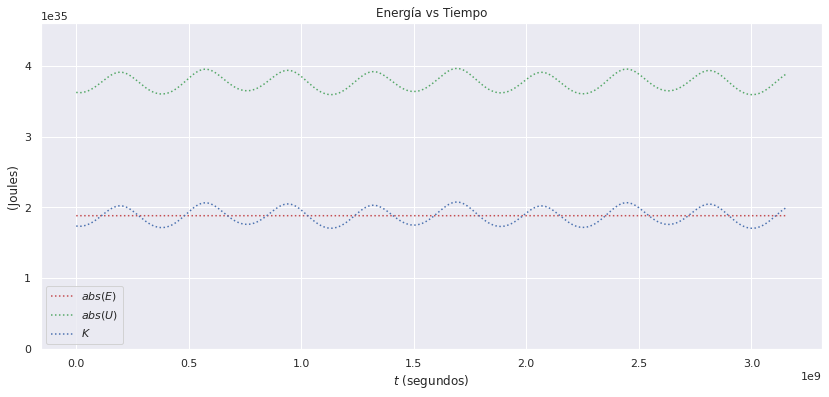

In [37]:
plt.figure(figsize=(14,6))
plt.title('Energía vs Tiempo')
plt.plot(Time,abs(E_T*1000000),'r:',label="$abs(E)$")
plt.plot(Time,abs(U_T*1000000),'g:',label="$abs(U)$")
plt.plot(Time,K_T*1000000,'b:',label="$K$")
plt.xlabel("$t$ (segundos)");
plt.ylabel("(Joules)");
plt.ylim(0,4.6*1e35)
plt.legend();

La gráfica confirma la teoría, E es constante. Incluso también confirma el teorema del virial, puesto que el valor absoluto de la energía total E es aproximadamente igual a la energía cinética promedio K. 

## Punto 3

Calcule usando exclusivamente SPICE el momentum angular total del sistema solar en la fecha del punto 1.  Recuerde que este vector define la normal al plano invariable de Laplace del sistema solar.  Repita el cálculo 100 años después y calcule el ángulo en el que el vector cambio. 

Ayuda: el ángulo entre dos vectores se calcula usando la propiedad del producto punto A⋅ B = A B cos θ.

In [12]:
#--------------------------------------------------------------------------
#--- Momento angular para la fecha: "2021-12-21 04:00:00 UTC-5"
#--------------------------------------------------------------------------

L0=0
for i in range(9):
  L0+=Estados.get('M%d' %i)*spy.vcrss(Estados.get('r_%d' %i),Estados.get('v%d' %i))
L0

array([8.23129786e+35, 2.60833345e+35, 3.13336875e+37])

In [13]:
#--------------------------------------------------------------------------
#--- Inclinación del plano invariable del Sistema Solar
#--------------------------------------------------------------------------

i=np.arccos(L0[2]/spy.vnorm(L0))  #radians ---> i = 1.75 grados 
i

0.027550199755119062

In [14]:
et3=spy.str2et("2121-12-21 04:00:00 UTC-5")
#--------------------------------------------
#----  Lista de los objetos de interés  -----
#--------------------------------------------
id_list=[
    'Mercury Barycenter',
    'Venus Barycenter',
    'Earth-Moon Barycenter',
    'Mars Barycenter',
    'Jupiter Barycenter',
    'Saturn Barycenter',
    'Uranus Barycenter',
    'Neptune Barycenter',
    'Sun']

Estados3=dict()
K_T=0
for i in range(0,9):

  estado_i,tf_i=spy.spkezr(id_list[i],et3,"ECLIPJ2000","None",'SSB')

  r_i=estado_i[0:3] #km 
  v_i=estado_i[3:6] #km/sec. 


  Estados3['r_%d' % i]= r_i
  Estados3['v%d' % i]= v_i


  GM=spy.bodvrd(id_list[i],"GM",1)[1][0]
  M_i=GM/G
  Estados3['M%d' % i]= M_i

In [15]:
#--------------------------------------------------------------------------
#--- Momento angular para la fecha: "2121-12-21 04:00:00 UTC-5"
#--------------------------------------------------------------------------
L=0
for i in range(9):
  L+=Estados3.get('M%d' %i)*spy.vcrss(Estados3.get('r_%d' %i),Estados3.get('v%d' %i))
L

array([8.23129781e+35, 2.60833393e+35, 3.13336874e+37])

In [16]:
#-------------------------------------
#--- Agulo entre los dos vectores ----
#-------------------------------------
θ= np.arccos(spy.vdot(L0,L)/(spy.vnorm(L)*spy.vnorm(L0)))  #radianes 
θ

2.1073424255447017e-08

In [17]:
#-------------------------------------
#--- Grados  -------------------------
#-------------------------------------
θ*180/np.pi

1.2074182697257333e-06

El valor angular que cambio el plano del sistema solar después de 100 años es bastante pequeño, igual 1.2074182697257333e-06 grados.

## Punto 4

Encuentre la inclinación del plano orbital de la Tierra respecto al plano invariable de Laplace del sistema solar calculado en 4 en la fecha inicial.

Ayuda: el ángulo entre el plano de la órbita de la Tierra y el plano invariable de Laplace es igual al ángulo entre el vector momentum angular de la Tierra y el vector momentum angular total del sistema solar.

In [18]:
def ang_momento(id_list,et3):

  Estados3=dict()
  K_T=0
  for i in range(len(id_list)):

    estado_i,tf_i=spy.spkezr(id_list[i],et3,"ECLIPJ2000","None",'SSB')

    r_i=estado_i[0:3] #km 
    v_i=estado_i[3:6] #km/sec. 


    Estados3['r_%d' % i]= r_i
    Estados3['v%d' % i]= v_i


    GM=spy.bodvrd(id_list[i],"GM",1)[1][0]
    M_i=GM/G
    Estados3['M%d' % i]= M_i
  #--------------------------------------------------------------------------
  #--- Momento angular para la fecha: "2121-12-21 04:00:00 UTC-5" -----------
  #--------------------------------------------------------------------------
  L=0
  for i in range(len(id_list)):
    L+=Estados3.get('M%d' %i)*spy.vcrss(Estados3.get('r_%d' %i),Estados3.get('v%d' %i))
  return L

In [19]:
#-------------------------------------
#--- Momento angular de la tierra ----
#-------------------------------------
id_list=['Sun', 'Earth-Moon Barycenter']
L1=ang_momento(id_list,et )
L1

array([1.00584599e+33, 3.40566875e+32, 7.02642224e+34])

In [20]:
#-------------------------------------
#--- Agulo entre los dos vectores ----
#-------------------------------------
θ= np.arccos(spy.vdot(L0,L1)/(spy.vnorm(L1)*spy.vnorm(L0)))  #radianes 
#grados
θ*180/np.pi


0.713005033744079

La inclinación del plano orbital de la Tierra respecto al plano invariable de Laplace del sistema solar es 0.713005033744079 grados

## Punto 5

Repetir lo anterior con todos los planetas del sistema solar ¿cuál es el planeta que presenta la mayor inclinación? ¿cuál es el planeta que presenta la menor inclinación?

In [21]:
planetas_list=[
    'Mercury Barycenter',
    'Venus Barycenter',
    'Earth-Moon Barycenter',
    'Mars Barycenter',
    'Jupiter Barycenter',
    'Saturn Barycenter',
    'Uranus Barycenter',
    'Neptune Barycenter',]

In [22]:
Ang=dict()
for i,c in enumerate(planetas_list):
  id_list=[c,'Sun']
  Ang[f'L{i+1}']=ang_momento(id_list,et)
  θ= np.arccos(spy.vdot(L0,Ang.get(f'L{i+1}'))/(spy.vnorm(Ang.get(f'L{i+1}'))*spy.vnorm(L0)))  #radianes 
  Ang[f'A{i+1}']= θ*180/np.pi

Angulos = np.array([(value) for key, value in Ang.items() if key.startswith("A")])
Angulos

array([0.15454242, 0.56936584, 0.71300503, 0.22142907, 0.3266505 ,
       0.92685898, 1.00605011, 0.71455993])

In [23]:
#-------------------------------------------------------------------------
#--- Valor mínimo en grados corresponde a Mercury Barycenter -------------
#-------------------------------------------------------------------------
np.min(Angulos)

0.1545424216975557

In [24]:
#-------------------------------------------------------------------------
#--- Valor máximo en grados corresponde a 'Uranus Barycenter' ------------
#-------------------------------------------------------------------------
np.max(Angulos)

1.0060501070770358

El planeta con mayor inclinación es Urano, i=1.0060501070770358 grados. 

EL planeta con menor inclinación es Mercurio, i=0.1545424216975557 grados.

## **El virial del sistema solar**

## Punto 6

* Eligiendo una fecha inicial arbitraria, calcule las posiciones y velocidades del **Sol, Júpiter y Saturno** a lo largo de 100 años en intervalos de 1 mes.
* Calcule la energía cinética (K), la energía potencial (U) y la energía total del sistema en todos los tiempos anteriores.


In [25]:
#intervalo de tiempo
et_i=spy.str2et("1921-12-21 04:00:00 UTC-5")
et_f=spy.str2et("2021-12-21 04:00:00 UTC-5")

time=np.linspace(et_i,et_f,1200)

In [26]:
def energia_mecanica(id_list):
    G=6.67e-20  # km^3 / kg s^2
    Estados2=dict()
    Total=dict()
    K_T=0
    F_T=0
    p=0
    for e_t in time:
      for i in range(0,3):
        estado_i,tf_i=spy.spkezr(id_list[i],e_t,"ECLIPJ2000","None",'SSB')
        r_i=estado_i[0:3] #km 
        v_i=estado_i[3:6] #km/sec. 
        Estados2['r_%d' % i]= r_i
        Estados2['v%d' % i]= v_i
        GM=spy.bodvrd(id_list[i],"GM",1)[1][0]
        M_i=GM/G
        Estados2['M%d' % i]= M_i
        #Energía cinetica
        K_i=M_i*spy.vnorm(v_i)**2/2  #kg(km/s)**2
        Estados2['K%d' % i]= K_i
        K_T=K_T+K_i  
        Total[f'K{p}']= K_T
      K_T=0
      K_i=0
      #Energía potencial gravitacional
      b1 = list(range(0,len(id_list)))
      e1 = itertools.combinations(b1,2)
      U_T=0
      for i,j in e1:
        U_k=-G*Estados2.get('M%d' %i)*Estados2.get('M%d' %j) / spy.vnorm(Estados2.get('r_%d' %i)-Estados2.get('r_%d' %j) ) # (km**2)kg/(s**2)
        U_T= U_T + U_k
        Total[f'U{p}']= U_T
      #Fuerza gravitacional
      F_=0
      b = list(range(0,len(id_list)))
      e = itertools.combinations(b,2)
      for i,j in e:
        F_+=np.array((-G*Estados2.get('M%d' %i)*Estados2.get('M%d' %j)/ (spy.vnorm(Estados2.get('r_%d' %i)-Estados2.get('r_%d' %j) ))**3))  * np.array(Estados2.get('r_%d' %i)-Estados2.get('r_%d' %j))
      Total[f'F{p}']=F_
      p=p+1
    #Fuerza gravitacional
    F_=0
    F=[]
    v=0
    b = list(range(0,len(id_list)))
    e = itertools.combinations(b,2)
    for i,j in e:
      r=np.array(Estados2.get('r_%d' %i)-Estados2.get('r_%d' %j))
      x=np.array((-G*Estados2.get('M%d' %i)*Estados2.get('M%d' %j)/ (spy.vnorm(Estados2.get('r_%d' %i)-Estados2.get('r_%d' %j) ))**3))  * np.array(Estados2.get('r_%d' %i)-Estados2.get('r_%d' %j))
      F_+=np.array((-G*Estados2.get('M%d' %i)*Estados2.get('M%d' %j)/ (spy.vnorm(Estados2.get('r_%d' %i)-Estados2.get('r_%d' %j) ))**3))  * np.array(Estados2.get('r_%d' %i)-Estados2.get('r_%d' %j))
      F.append(x)
      v+=spy.vdot(r,x)

      Total[f'F2{p}']=F_
      p=p+1
    #arreglos con las energías y las fuerzas para los 100 años tomados.
    K_T = np.array([(value) for key, value in Total.items() if key.startswith("K")])
    U_T = np.array([(value) for key, value in Total.items() if key.startswith("U")])
    F_T = np.array([(value) for key, value in Total.items() if key.startswith("F")])
    return F_T,K_T, U_T,v
    

In [27]:
#--------------------------------------------
#----Nueva lista de los objetos de interés---
#--------------------------------------------
id_list=[
    'Jupiter Barycenter',
    'Saturn Barycenter',
    'Sun']
F_T,K_T, U_T,v =energia_mecanica(id_list)
#-------------------------------------
#--- Energía total por 100 años. -----
#-------------------------------------
E_T=K_T+U_T

## Punto 7
* En el tiempo inicial, calcule las fuerzas que siente cada cuerpo y use la fórmula original del virial para V=∑ rᵢ⋅ Fᵢ para calcular su valor.  Compárelo con el valor de la energía potencial en ese tiempo inicial ¿coincide con lo visto en clase?.
* Encuentre el promedio de K, U y E.  ¿Se cumple el teorema del virial para el sistema Sol, Júpiter y Saturno?


In [28]:
print(f'Virial del sistema: {v:.2e}')
print(f'Energía potencial del sistema: {U_T[0]:.2e}')

Virial del sistema: -3.88e+29
Energía potencial del sistema: -3.62e+29


In [29]:
#-------------------------------------
#--- Razón.  -------------------------
#-------------------------------------
v/U_T[0]

1.0718554590213398

In [30]:
#-------------------------------------
#--- Promedio de K, U y E ------------
#-------------------------------------
kprom=np.mean(K_T)
uprom=np.mean(U_T)
eprom=np.mean(E_T)

 ¿Se cumple el teorema del virial para el sistema Sol, Júpiter y Saturno?

<figure>
<center>

![](https://drive.google.com/uc?export=view&id=1IoRKc6kUHOFQ8hBJS0Iq-eHtTFDcJWsF)

<figcaption>Tomado de: http://astronomia-udea.co/MecanicaCeleste-Zuluaga/mybook.pdf </figcaption></center>
</figure>

In [31]:
#--------------------------------------------------------------------------
#verifiquemos que las igualdades que el teorema enuncia se cumplen para el sistema.
#--------------------------------------------------------------------------
print(f' La energía potencial promedio es: {uprom:.2e} \n Y el negativo de dos veces la energía cinética promedio es: {-2*kprom:.2e}' )

 La energía potencial promedio es: -3.76e+29 
 Y el negativo de dos veces la energía cinética promedio es: -3.76e+29


In [32]:
#-------------------------------------
#--- Razón entre los dos -------------
#-------------------------------------
-2*kprom/uprom

0.9988394035909872

In [33]:
print(f' La energía total promedio es: {eprom:.2e} \n y el negativo de la energía cinética promedio es: {-kprom:.2e}' )

 La energía total promedio es: -1.88e+29 
 y el negativo de la energía cinética promedio es: -1.88e+29


In [34]:
#-------------------------------------
#--- Razón entre los dos -------------
#-------------------------------------
eprom/kprom

-1.0023238899163174

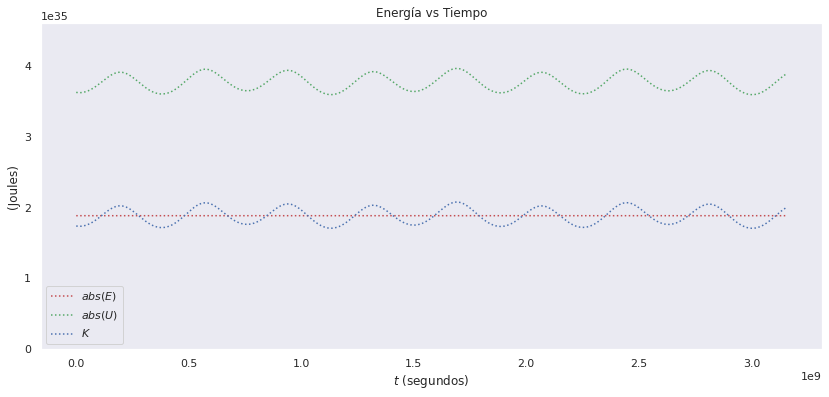

In [38]:
Time=np.linspace(0,100*365.25*86400,1200)
plt.figure(figsize=(14,6))
plt.title('Energía vs Tiempo')
plt.plot(Time,abs(E_T*1000000),'r:',label="$abs(E)$")
plt.plot(Time,abs(U_T*1000000),'g:',label="$abs(U)$")
plt.plot(Time,K_T*1000000,'b:',label="$K$")
plt.xlabel("$t$ (segundos)");
plt.ylabel("(Joules)");
plt.ylim(0,4.6*1e35)
plt.grid()
plt.legend();